In [3]:
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(16,9)})
import geopandas as gpd
import geoplot

In [4]:
#LSOA: https://geoportal.statistics.gov.uk/datasets/ons::lower-layer-super-output-areas-december-2011-boundaries-super-generalised-clipped-bsc-ew-v3/about
#MSOA: https://geoportal.statistics.gov.uk/datasets/middle-layer-super-output-areas-december-2011-boundaries-generalised-clipped-bgc-ew-v3/explore?location=52.854079%2C-2.489527%2C6.69
#Local Authority Districts:https://geoportal.statistics.gov.uk/datasets/bc2820b03de244698c0b0771ae4f345f/explore?location=55.401864%2C-3.316939%2C6.07&showTable=true
# Lookup table between these: 
# https://geoportal.statistics.gov.uk/datasets/6a46e14a6c2441e3ab08c7b277335558/about
filename = "data/LAD.geojson"
df_lad = gpd.read_file(filename)
df_lad.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       379 non-null    int64   
 1   LAD20CD        379 non-null    object  
 2   LAD20NM        379 non-null    object  
 3   LAD20NMW       379 non-null    object  
 4   BNG_E          379 non-null    int64   
 5   BNG_N          379 non-null    int64   
 6   LONG           379 non-null    float64 
 7   LAT            379 non-null    float64 
 8   Shape__Area    379 non-null    float64 
 9   Shape__Length  379 non-null    float64 
 10  geometry       379 non-null    geometry
dtypes: float64(4), geometry(1), int64(3), object(3)
memory usage: 32.7+ KB


In [5]:
df_lad.set_index("LAD20CD", inplace=True)
df_lad.head()

,OBJECTID,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,geometry
LAD20CD,,,,,,,,,,
E06000001,1,Hartlepool,,447160,531474,-1.27018,54.676140,9.371263e+07,71007.443285,"MULTIPOLYGON (((-1.26846 54.72612, -1.26822 54..."
E06000002,2,Middlesbrough,,451141,516887,-1.21099,54.544670,5.388156e+07,44481.691242,"MULTIPOLYGON (((-1.24928 54.59072, -1.24917 54..."
E06000003,3,Redcar and Cleveland,,464361,519597,-1.00608,54.567520,2.450695e+08,96703.989701,"MULTIPOLYGON (((-1.13485 54.64296, -1.13505 54..."
E06000004,4,Stockton-on-Tees,,444940,518183,-1.30664,54.556911,2.049330e+08,123408.985928,"MULTIPOLYGON (((-1.31729 54.64480, -1.31715 54..."
E06000005,5,Darlington,,428029,515648,-1.56835,54.535339,1.974757e+08,107206.401677,"POLYGON ((-1.63768 54.61714, -1.63767 54.61670..."


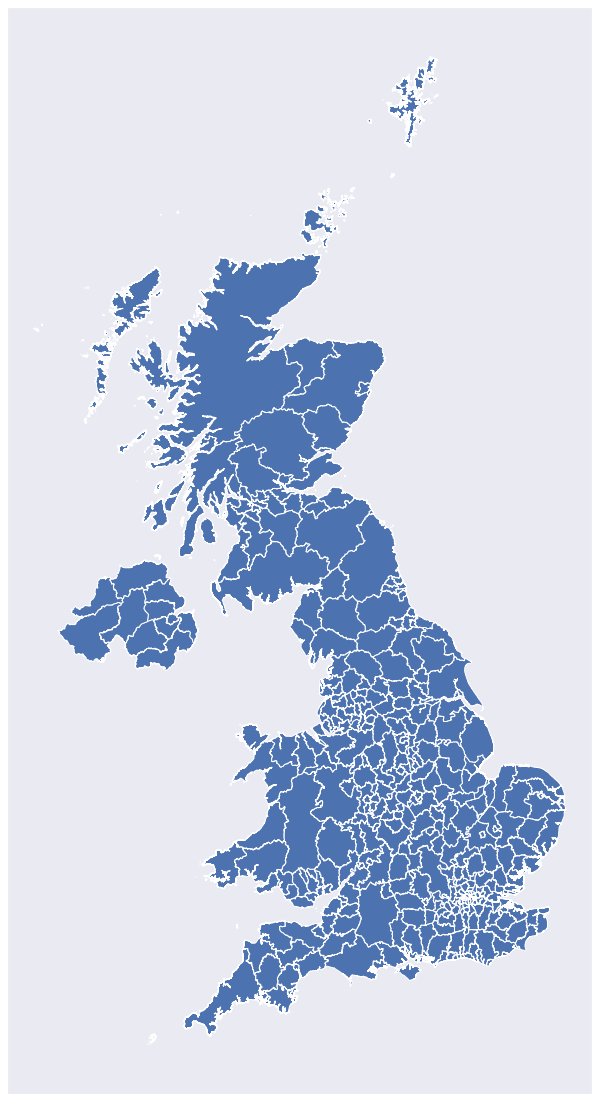

In [6]:
ax = df_lad.plot(figsize=(12,20))
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

In [7]:
#England + Wales is around 130.000 + 20.000 km^2
df_lad["Shape__Area"].sum()
# Hence the Shape__Area / Shape__Length is in m

244376485952.60535

In [8]:
# We convert area and length to m/square km
dfn = df_lad.copy()
dfn["Shape__Area"] /= 1e6
dfn["Shape__Length"] /= 1e3
dfn.head(10)

,OBJECTID,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,geometry
LAD20CD,,,,,,,,,,
E06000001,1,Hartlepool,,447160,531474,-1.27018,54.676140,93.712629,71.007443,"MULTIPOLYGON (((-1.26846 54.72612, -1.26822 54..."
E06000002,2,Middlesbrough,,451141,516887,-1.21099,54.544670,53.881564,44.481691,"MULTIPOLYGON (((-1.24928 54.59072, -1.24917 54..."
E06000003,3,Redcar and Cleveland,,464361,519597,-1.00608,54.567520,245.069509,96.703990,"MULTIPOLYGON (((-1.13485 54.64296, -1.13505 54..."
E06000004,4,Stockton-on-Tees,,444940,518183,-1.30664,54.556911,204.932954,123.408986,"MULTIPOLYGON (((-1.31729 54.64480, -1.31715 54..."
E06000005,5,Darlington,,428029,515648,-1.56835,54.535339,197.475689,107.206402,"POLYGON ((-1.63768 54.61714, -1.63767 54.61670..."
E06000006,6,Halton,,354246,382146,-2.68853,53.334240,79.084035,77.771103,"MULTIPOLYGON (((-2.62684 53.35464, -2.62693 53..."
E06000007,7,Warrington,,362744,388456,-2.56167,53.391628,180.627984,114.690862,"POLYGON ((-2.49407 53.48010, -2.49396 53.48006..."
E06000008,8,Blackburn with Darwen,,369490,422806,-2.46360,53.700802,137.022080,65.284971,"POLYGON ((-2.46850 53.78164, -2.46838 53.78158..."
E06000009,9,Blackpool,,332819,436635,-3.02199,53.821640,34.870886,34.483487,"POLYGON ((-3.02057 53.86713, -3.02121 53.86585..."


Text(0, 0.5, 'Area (km)')

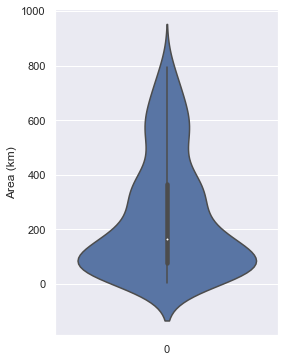

In [9]:
quantile = 0.8
areas_typical = dfn[dfn["Shape__Area"] <= dfn["Shape__Area"].quantile(quantile)]["Shape__Area"]
fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=True, figsize=(4,6))
sns.violinplot(data=areas_typical);
ax.set_title("")
ax.set_ylabel("Area (km)")

In [11]:
df_conv = pd.read_csv("data/model_conversion.csv")

df_conv.head()

,Unnamed: 0,names,codes
0,0,Babergh,E07000200
1,1,Bath and North East Somerset,E06000022
2,2,"Bristol, City of",E06000023
3,3,Forest of Dean,E07000080
4,4,Mendip,E07000187


In [35]:
df_results = pd.read_csv("data/hw_results.csv")
df_results["ladc"] = df_conv["codes"]
df_results["ladnm"] = df_conv["names"]
df_results.set_index("ladc", inplace=True)
df_results.head(20)

,Unnamed: 0,r2,MAE,MedAE,MSE,RMSE,MAPE,MDAPE,ladnm
ladc,,,,,,,,,
E07000200,0,-2.679438,35581.180383,32298.879189,1.845260e+09,42956.484954,14.932559,13.102538,Babergh
E06000022,1,-0.050310,67543.726396,56921.975029,6.939625e+09,83304.409289,13.334267,10.562035,Bath and North East Somerset
E06000023,2,-0.294911,267984.288933,264460.815071,1.011529e+11,318045.489140,11.747266,10.891756,"Bristol, City of"
E07000080,3,-0.317146,33569.255826,29621.732360,1.691563e+09,41128.614616,14.096742,12.184471,Forest of Dean
E07000187,4,-1.051226,44571.487673,37059.202858,3.165748e+09,56264.983118,15.496995,11.437310,Mendip
E07000042,5,-0.988285,21652.234016,18337.391657,7.479961e+08,27349.517297,11.713698,10.272345,Mid Devon
E06000024,6,-0.304910,83430.710351,65901.896816,1.117993e+10,105735.185679,12.720063,9.076181,North Somerset
E07000220,7,-0.547477,51959.736244,45089.606382,4.204603e+09,64842.913163,14.082228,11.079671,Rugby
E07000188,8,-0.402723,83400.292310,69927.910103,1.062872e+10,103095.694725,17.618044,13.347746,Sedgemoor


<AxesSubplot:ylabel='Density'>

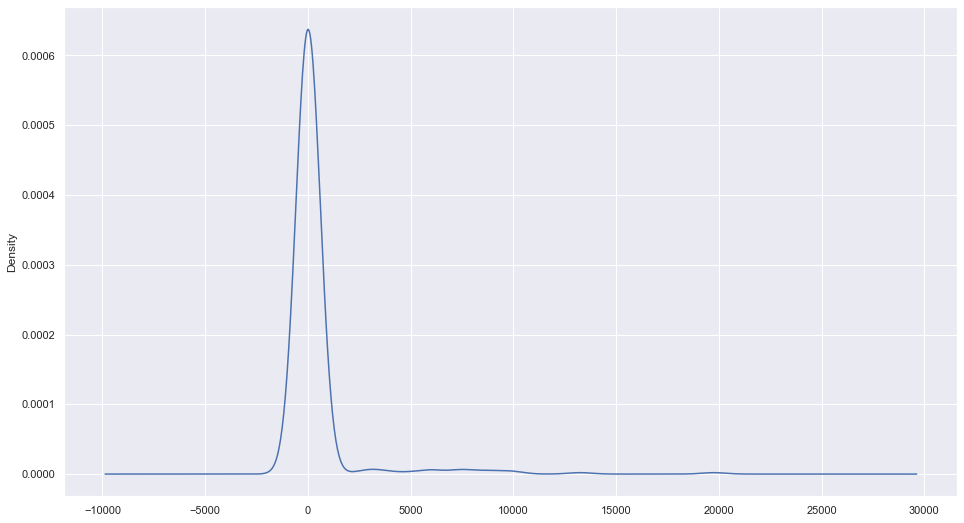

In [39]:
df_results["MDAPE"].plot(kind="density")

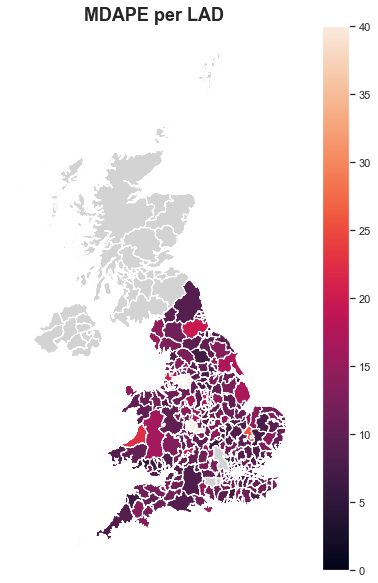

In [92]:
mn = "MDAPE"
mc = df_results[mn]
map_df = df_lad.copy()
map_df[mn] = mc

# Note: this code sample requires geoplot>=0.4.0.
# geoplot.choropleth(
#     df_lad, hue=map_df[mn],
#     cmap="Greens", legend=True,
#     figsize=(10,15)
# )
ax = map_df.plot(column=mn, legend=True, missing_kwds = dict(color = "lightgrey",), figsize=(8,10), vmin=0, vmax=40)
ax.set_title(f"{mn} per LAD", size=18, weight="bold")
plt.axis('off')
ax.get_figure().savefig(f"{mn}.svg", bbox_inches='tight')
ax.get_figure().savefig(f"{mn}.png", bbox_inches='tight', dpi=600)

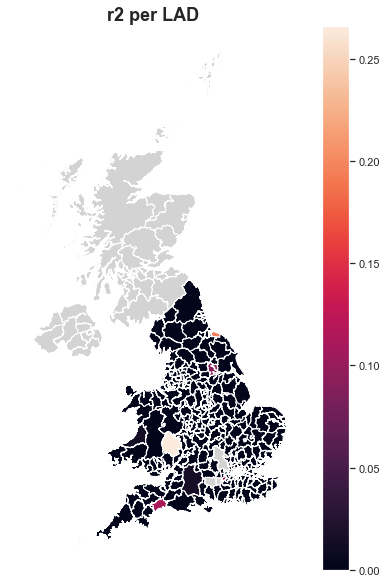

In [90]:
mn = "r2"
mc = df_results[mn]
map_df = df_lad.copy()
map_df[mn] = mc

# Note: this code sample requires geoplot>=0.4.0.
# geoplot.choropleth(
#     df_lad, hue=map_df[mn],
#     cmap="Greens", legend=True,
#     figsize=(10,15)
# )
ax = map_df.plot(column=mn, legend=True, missing_kwds = dict(color = "lightgrey",), figsize=(8,10), vmin=0)
ax.set_title(f"{mn} per LAD", size=18, weight="bold")
plt.axis('off')
ax.get_figure().savefig(f"{mn}.svg", bbox_inches='tight')
ax.get_figure().savefig(f"{mn}.png", bbox_inches='tight', dpi=600)

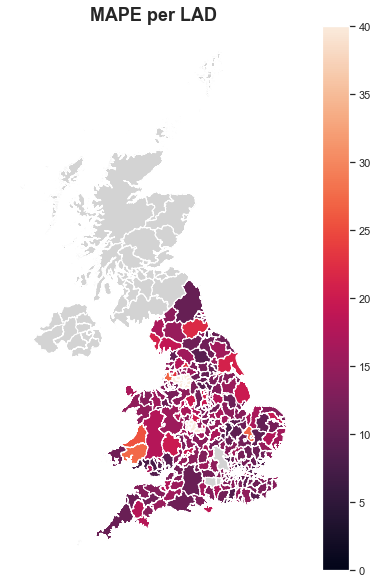

In [91]:
mn = "MAPE"
mc = df_results[mn]
map_df = df_lad.copy()
map_df[mn] = mc

# Note: this code sample requires geoplot>=0.4.0.
# geoplot.choropleth(
#     df_lad, hue=map_df[mn],
#     cmap="Greens", legend=True,
#     figsize=(10,15)
# )
ax = map_df.plot(column=mn, legend=True, missing_kwds = dict(color = "lightgrey",), figsize=(8,10), vmin=0, vmax=40)
ax.set_title(f"{mn} per LAD", size=18, weight="bold")
plt.axis('off')
ax.get_figure().savefig(f"{mn}.svg", bbox_inches='tight')
ax.get_figure().savefig(f"{mn}.png", bbox_inches='tight', dpi=600)